# 1 - Entendimento do problema - O problema a ser solucionado.

O projeto visa indicar qual perfil de investidor é mais adequado com base no comportamento do mercado de bitcoin. 

1.1 - Quais são os perfis de investidores?

- Conservadores, moderados e arrojados.

1.1.2 - Quais a bases fundamentais dos perfis? 

- Segurança
- Liquidez
- Rentabilidade

1.1.3 - Como influenciam no perfil dos investidores?

- Conservadores: Segurança como prioridade.
- Moderados:

1.1.4 - Quais são os indicadores de determinantes para a escolha?

#2 - Coleta de dados e referências do projeto

Conjunto de dados utilizado:

 https://www.kaggle.com/mczielinski/bitcoin-historical-data

Referências:

https://www.notion.so/https-towardsdatascience-com-dynamic-cryptocurrency-trading-backtesting-platform-python-219dfcd742-eb894aef1a504d6fb363e3854f870350


# 3 - Análise, interpretação e Visualização 


Bibliotecas utilizadas


In [1]:
#manipulação de dados
import pandas as pd
import numpy as np
from scipy.stats import norm

#Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [3]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
773878,1371750600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773879,1371750660,106.50,107.00,106.50,107.00,8.275224,883.886126,106.811136
773880,1371750720,107.00,107.00,107.00,107.00,2.556180,273.511260,107.000000
773881,1371750780,107.02,107.50,107.02,107.50,10.920048,1170.948590,107.229251


Primeria inspecção dos dados 


In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Inspecionando o tamanho do dataframe
df.size

6191064

In [6]:
#Inspecionando a forma do df.
df.shape

(773883, 8)

In [7]:
#Informações iniciais
df.info

<bound method DataFrame.info of          Timestamp    Open  ...  Volume_(Currency)  Weighted_Price
0       1325317920    4.39  ...           2.000000        4.390000
1       1325317980     NaN  ...                NaN             NaN
2       1325318040     NaN  ...                NaN             NaN
3       1325318100     NaN  ...                NaN             NaN
4       1325318160     NaN  ...                NaN             NaN
...            ...     ...  ...                ...             ...
773878  1371750600     NaN  ...                NaN             NaN
773879  1371750660  106.50  ...         883.886126      106.811136
773880  1371750720  107.00  ...         273.511260      107.000000
773881  1371750780  107.02  ...        1170.948590      107.229251
773882  1371750840  107.50  ...                NaN             NaN

[773883 rows x 8 columns]>

In [8]:
#verificando o tipo dos dados
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [9]:
#obtendo informações estatísticas iniciais. 
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,7.738830e+05,140198.000000,140198.000000,140198.000000,140197.000000,140197.000000,140197.000000,140197.000000
mean,1.348534e+09,85.364586,85.456992,85.243465,85.347255,13.639306,902.826988,85.349415
std,1.340406e+07,51.117473,51.172293,51.042816,51.103935,38.974270,2677.530713,51.106433
min,1.325318e+09,3.800000,3.800000,1.000000,3.800000,0.000000,0.000000,3.800000
25%,1.336926e+09,27.500000,27.500000,27.500000,27.500000,1.000000,65.068961,27.500000
50%,1.348534e+09,105.480000,105.620000,105.235000,105.460000,3.000000,165.028878,105.440000
75%,1.360143e+09,120.900000,120.990000,120.760000,120.910000,11.102859,617.326104,120.900000
max,1.371751e+09,259.340000,259.340000,259.340000,259.340000,2958.477574,184018.351190,259.340000


In [10]:
#dados faltantes, todas as features com 1243608 dados faltantes.
df.isnull().sum()

Timestamp                 0
Open                 633685
High                 633685
Low                  633685
Close                633686
Volume_(BTC)         633686
Volume_(Currency)    633686
Weighted_Price       633686
dtype: int64

In [11]:
#mudando a feature timestamp para formato dd/mm/aa
df["Timestamp"]=pd.to_datetime(df["Timestamp"],unit='s').dt.date



In [12]:
df["Timestamp"].describe

<bound method NDFrame.describe of 0         2011-12-31
1         2011-12-31
2         2011-12-31
3         2011-12-31
4         2011-12-31
             ...    
773878    2013-06-20
773879    2013-06-20
773880    2013-06-20
773881    2013-06-20
773882    2013-06-20
Name: Timestamp, Length: 773883, dtype: object>

In [13]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
773878,2013-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773879,2013-06-20,106.50,107.00,106.50,107.00,8.275224,883.886126,106.811136
773880,2013-06-20,107.00,107.00,107.00,107.00,2.556180,273.511260,107.000000
773881,2013-06-20,107.02,107.50,107.02,107.50,10.920048,1170.948590,107.229251


In [14]:
#correlação entre as features
corr=df.corr()
corr

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999952,0.999905,0.999933,-0.130891,0.147870,0.999971
High,0.999952,1.000000,0.999854,0.999942,-0.129703,0.149812,0.999960
Low,0.999905,0.999854,1.000000,0.999937,-0.132423,0.145472,0.999945
Close,0.999933,0.999942,0.999937,1.000000,-0.131138,0.147511,0.999969
Volume_(BTC),-0.130891,-0.129703,-0.132423,-0.131138,1.000000,0.685708,-0.131176
Volume_(Currency),0.147870,0.149812,0.145472,0.147511,0.685708,1.000000,0.147476
Weighted_Price,0.999971,0.999960,0.999945,0.999969,-0.131176,0.147476,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

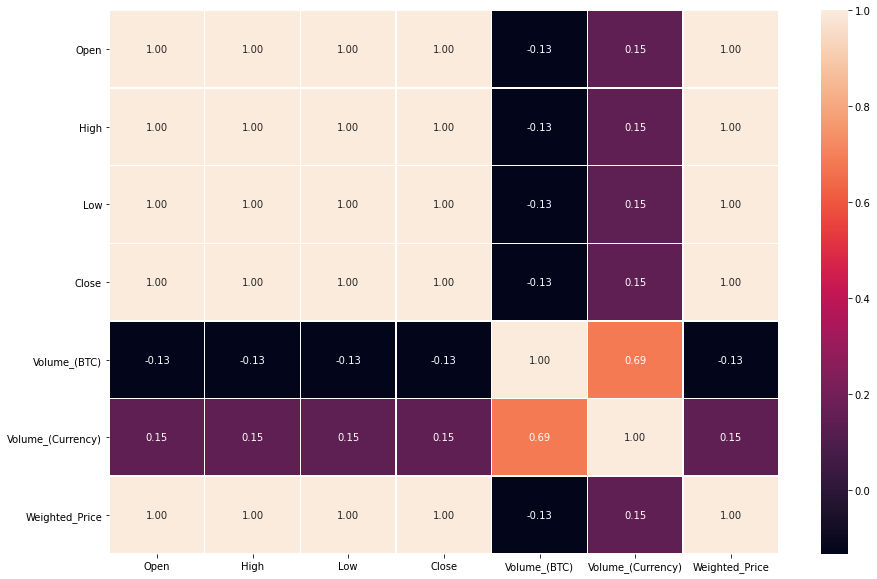

In [15]:
plt.figure(figsize=(15,10))
corr
sns.heatmap(data=corr, annot=True, linewidths=0.5, fmt=".2f",cmap="rocket")
plt.xticks(rotation=0)

#Correlação entre as features.

1 - Timestamp tem grande correlação com as features Close, Low, High e open. Baixa correlação com BTC e Currency. 

2 - Open, high, low e close têm entre si grande correlação. (esperado).

3 - BTC e  CURRENCY têm moderada correlação entre si, baixa com as demais features. 

4 - WEIGHTED PRICE tem alta correlação com as features timestamp, open, high, low e close. E baixa com as fetures BTC E CURRENCY. 





##Dicionário de dados

1 - Timestamp - Hora de início da janela. Janelas de 60s em unidade de time unix. Tipo - int.

2 - Open - Valor de abertura no início da janela. Tipo de dado - float.

3 - High - Valor mais alto durante a janela. Tipo de dado - float.

4 - Low - Valor mais baixo durante a janela. Tipo de dado - float. 

5 - Close - Valor no fechamento da janela. Tipo de dado - float. 

6 - Volume BTC - Volume de bitcoin transacionado na respectiva janela. Tipo de dado - float.

7 - Volume currency - Volume total de cryptomoedas transacionadas na respectiva janela. Tipo de dado - float.

8 - Weighted Price - VWAP - Preço médio ponderado por volume. É obtido da razão entre o somatório do produto do número de bitcoin comprado pelo preço, e o total de bitcoin comprado. Tipo de dado - float.  

#Dados faltantes e duplicatas.

A abordagem adotada com relação aos NaN presentes no conjunto de dados foi de, a princípio, não leva-los em consideração deste ponto em diante. Devido ao fato de serem apenas dados faltantes que não deverão influenciar no presente projeto.


In [16]:
#Cópia do df para exclusão dos faltantes.
df_sem_faltantes= df.copy()

In [17]:
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Excluindo os dados faltantes (NaN)
df_sem_faltantes.dropna(inplace=True)

In [19]:
#Nova forma (tamanho) do dataframe
df_sem_faltantes.shape

(140197, 8)

In [20]:
df_sem_faltantes.size

1121576

In [21]:
#Verificando
df_sem_faltantes.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [37]:
df_sem_faltantes.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
773876,2013-06-20,106.50,106.5,106.50,106.5,3.000000,319.500000,106.500000
773877,2013-06-20,106.50,106.5,106.50,106.5,8.500000,905.250000,106.500000
773879,2013-06-20,106.50,107.0,106.50,107.0,8.275224,883.886126,106.811136
773880,2013-06-20,107.00,107.0,107.00,107.0,2.556180,273.511260,107.000000
773881,2013-06-20,107.02,107.5,107.02,107.5,10.920048,1170.948590,107.229251


In [22]:
#Verificando em todo o dataframe.
df_sem_faltantes.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [23]:
#Verificando para dados duplicados
df_sem_faltantes.duplicated().sum()

12121

#Outliers

A estratégia adotada para a detecção de outliers foi a visualização em box plot de uma das features do dataframe (Open). 

Com máximo de 259.34 e mínimo de 3.8, esses valores se mostraram abaixo dos limites superior, 261, e inferior,-112,6 respectivamente, indicando assim a não ocorrência de outliers nesse conjunto de dados.

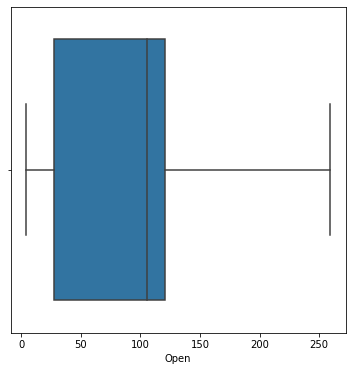

In [46]:
#Verificando a existência de outliers através de visulização em box plot
plt.figure(figsize=[6,6])
sns.boxplot(x=df_sem_faltantes["Open"], data=df_sem_faltantes)



In [42]:
#Calculando intervalo interquartil
q1= df_sem_faltantes["Open"].quantile(0.25)
q3= df_sem_faltantes["Open"].quantile(0.75)
IQL= q3 - q1
print(IQL)

93.4


In [45]:
#Estabelecendo os limites superior e inferior
LS = q3+1.5*IQL
LI = q1-1.5*IQL
print(LS)
print(LI)

261.0
-112.60000000000002


In [47]:
#Verificando os pontos de máximo e mínimo das observações
df_sem_faltantes["Open"].describe()

count    140197.000000
mean         85.364428
std          51.117621
min           3.800000
25%          27.500000
50%         105.480000
75%         120.900000
max         259.340000
Name: Open, dtype: float64

#Análise das features

Timestamp:
  Hora de início da janela. Janelas de 60s em unidade de time unix.

In [25]:
df_sem_faltantes["Timestamp"]

0         2011-12-31
478       2011-12-31
547       2011-12-31
548       2011-12-31
1224      2012-01-01
             ...    
773876    2013-06-20
773877    2013-06-20
773879    2013-06-20
773880    2013-06-20
773881    2013-06-20
Name: Timestamp, Length: 140197, dtype: object

In [26]:
#Verificando o tipo
df_sem_faltantes["Timestamp"].dtypes

dtype('O')

In [27]:
#Verificando dados faltantes
df_sem_faltantes["Timestamp"].isnull().sum()

0

In [28]:
#Informações estátisticas sobre a feature
df_sem_faltantes["Timestamp"].describe()

count         140197
unique           538
top       2013-06-01
freq            1404
Name: Timestamp, dtype: object

#Open

Valor de abertura da janela. 


In [29]:
df_sem_faltantes["Open"]

0           4.39
478         4.39
547         4.50
548         4.58
1224        4.58
           ...  
773876    106.50
773877    106.50
773879    106.50
773880    107.00
773881    107.02
Name: Open, Length: 140197, dtype: float64

In [30]:
#Informações estatísticas iniciais
df_sem_faltantes["Open"].describe()

count    140197.000000
mean         85.364428
std          51.117621
min           3.800000
25%          27.500000
50%         105.480000
75%         120.900000
max         259.340000
Name: Open, dtype: float64

In [31]:
#Verificando para dados faltantes 
df_sem_faltantes["Open"].isnull().sum()

0

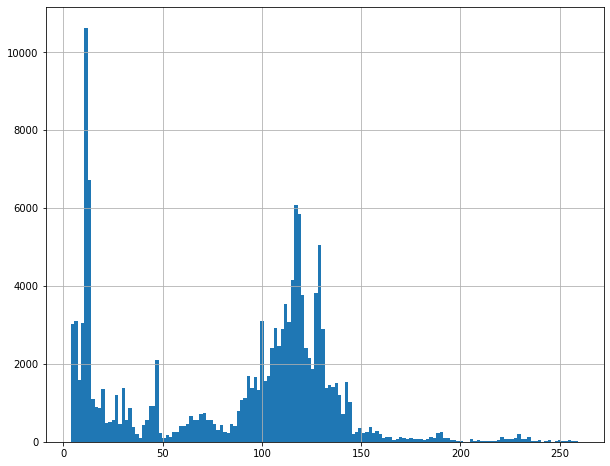

In [32]:
df_sem_faltantes["Open"].hist(bins=150, figsize=(10,8))

In [33]:
#Verificando a curtose da distribuição 
df_sem_faltantes["Open"].kurtosis()

-0.7483106315836356

In [34]:
#Verificando a simetria da distribuição 
df_sem_faltantes["Open"].skew()

-0.20511223938904508

In [35]:
x_list=np.linspace(df_sem_faltantes.Open.min(),df_sem_faltantes.Open.max(), 100)
y_list=norm.pdf(x_list,loc=df_sem_faltantes.Open.mean(), scale=df_sem_faltantes.Open.std())

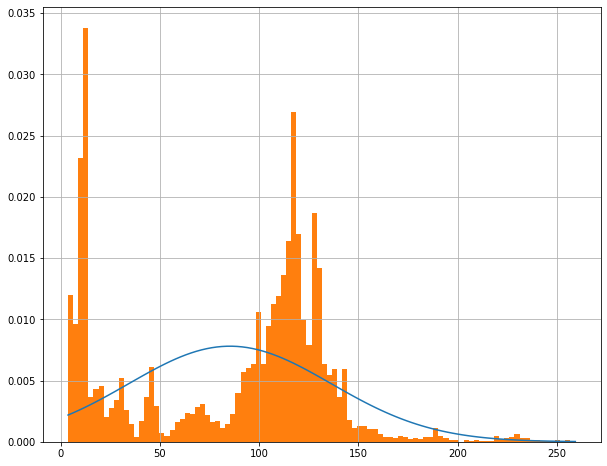

In [36]:
plt.plot(x_list,y_list)
df_sem_faltantes["Open"].hist(bins=100, figsize=(10,8), density=True)


